In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DNA_SIZE = 10           # DNA的长度
POP_SIZE = 100          # 初始种群大小
CROSS_RATE = 0.8        # DNA交叉概率
MUTATION_RATE = 0.003   # DNA变异概率
N_GENERATIONS = 200     # 迭代次数
X_BOUND = [0, 5]        # 迭代中x的取值区间

这里是为了求$f(x)=sin(10x)*x+cos(2x)*x$

In [3]:
def F(x):
    # 目标函数
    return np.sin(10*x)*x+np.cos(2*x)*x

In [4]:
def get_fitness(pred):
    # 获得适应度，与min比较，越大则适应度越大，便于我们寻找最大值
    return pred-np.min(pred)+1e-3

In [5]:
def translateDNA(pop):
    # 将DNA的二进制序列映射到x范围内
    return pop.dot(2**np.arange(DNA_SIZE)[::-1])/float(2**DNA_SIZE-1)*(X_BOUND[1]-X_BOUND[0])


In [17]:
# 测试translateDNA
test_data = np.array([1,0,0,0,0,0,0,0,1,1])
print(translateDNA(test_data))
# 测试translateDNA
test_data = np.array([1,1,1,1,1,1,1,1,1,1])
print(translateDNA(test_data))

2.517106549364614
5.0


In [7]:
def select(pop, fitness):
    # 根据适应度fitness来选择pop中的parent，fitness越大越有可能选到
    index = np.random.choice(np.arange(POP_SIZE), size=POP_SIZE,replace=True,p=fitness/fitness.sum())

    return pop[index]

In [8]:
def crossover(parent,pop):
    # 交叉函数
    if np.random.rand() < CROSS_RATE:
        i_ = np.random.randint(0,POP_SIZE,size=1) # 随机选择一个母本的index
        print('i_:',i_)
        print('i_.size',i_.size)
        cross_points = np.random.randint(0,2,size = DNA_SIZE).astype(np.bool)   # 选择交叉的点
        print('cross_point',cross_points)
        print('corssize:',cross_points.size)
        print(parent[cross_points])
        print(pop[i_,cross_points])

        # 交配并产生子代
        parent[cross_points] = pop[i_,cross_points]
        print(parent[cross_points])
    
    return parent

In [9]:
def muate(child):
    # 变异函数
    for point in range(DNA_SIZE):
        if np.random.rand() < MUTATION_RATE:
            child[point] = 1 if child[point] == 0 else 0
    return child

In [10]:
# 初始化DNA为pop
pop = np.random.randint(2, size=(POP_SIZE, DNA_SIZE))   

In [11]:
# 测试pop的值
# print(pop)


In [12]:
for _ in range(N_GENERATIONS):
    # 循环进行遗传函数的迭代
    
    F_values = F(translateDNA(pop)) # 通过提取DNA计算

    # 中间过程的绘图
    # if 'sca' in globals():
    #     sca.remove()
    # sca = plt.scatter(translateDNA(pop), F_values,
    #                   s=200, lw=0, c='red', alpha=0.5)
    # x = np.linspace(*X_BOUND,200)
    # plt.plot(x,F(x))
    # plt.pause(0.05)
    # 中间过程的绘图结束

    # GA 遗传变异迭代一次
    fitness = get_fitness(F_values)
    print("Most fitted DNA: ", pop[np.argmax(fitness), :])
    pop = select(pop,fitness)
    pop_copy = pop.copy()
    for parent in pop:
        child = crossover(parent,pop_copy)
        child = muate(child)
        parent[:]=child        # 用子代替换父代


 [88]
i_.size 1
cross_point [ True False False False  True False False False  True False]
corssize: 10
[1 1 1]
[1 1 1]
[1 1 1]
i_: [63]
i_.size 1
cross_point [ True False  True  True False  True False  True False  True]
corssize: 10
[1 1 0 0 0 0]
[1 1 0 0 0 0]
[1 1 0 0 0 0]
i_: [88]
i_.size 1
cross_point [ True False False  True  True False False  True  True False]
corssize: 10
[1 0 1 0 1]
[1 0 1 0 1]
[1 0 1 0 1]
i_: [34]
i_.size 1
cross_point [False False False  True  True  True False  True  True  True]
corssize: 10
[0 1 0 0 1 0]
[0 1 0 0 1 0]
[0 1 0 0 1 0]
i_: [31]
i_.size 1
cross_point [False False  True False False False  True False  True False]
corssize: 10
[1 0 1]
[1 0 1]
[1 0 1]
i_: [90]
i_.size 1
cross_point [False False  True False False  True False  True False False]
corssize: 10
[1 0 0]
[1 0 0]
[1 0 0]
i_: [36]
i_.size 1
cross_point [ True False False False False False False  True  True False]
corssize: 10
[1 0 1]
[1 0 1]
[1 0 1]
i_: [42]
i_.size 1
cross_point [ True  True F

x: [3.29423265 3.29423265 3.29423265 3.29423265 3.29423265 3.29423265
 3.29423265 3.29423265 3.29423265 3.29423265 3.29423265 3.29423265
 3.29423265 3.29423265 3.29423265 3.29423265 3.29423265 3.29423265
 3.29423265 3.29423265 3.29423265 3.29423265 3.29423265 3.29423265
 3.29423265 3.29423265 3.29423265 3.29423265 3.29423265 3.29423265
 3.29423265 3.29423265 3.29423265 3.29423265 3.29423265 3.29423265
 3.29423265 2.6686217  3.29423265 3.29423265 3.29423265 3.29423265
 3.29423265 3.29423265 3.29423265 3.29423265 3.29423265 3.29423265
 3.29423265 3.31378299 3.29423265 3.29423265 3.29423265 3.29423265
 3.29423265 3.29423265 3.29423265 3.29423265 3.29423265 3.29423265
 3.29423265 3.29423265 3.29423265 3.29423265 3.29423265 3.29423265
 3.29423265 3.29423265 3.29423265 3.29423265 3.60703812 3.29423265
 3.29423265 3.29423265 3.29423265 3.29423265 3.29423265 3.29423265
 3.29423265 3.29423265 3.29423265 3.29423265 3.29423265 3.29423265
 3.29423265 3.29423265 3.29423265 3.29423265 3.29423265 3.2

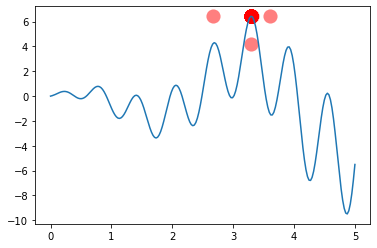

In [13]:
# 最终结果绘制
plt.ion()                           # 打开交互模式
x = np.linspace(*X_BOUND,200)
plt.plot(x,F(x))

plt.scatter(translateDNA(pop),F_values,s=200,lw=0,c='red',alpha=0.5)
print("x:",translateDNA(pop))
print(type(translateDNA(pop)))
print(len(translateDNA(pop)))
print("max:", F_values)
plt.ioff()                          # 关闭交互模式
plt.show()